In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

person_data = pd.read_csv(r'F:\datasets\customer&fixed-position/trainperson-ccf_first_round_user_shop_behavior.csv')
shop_data = pd.read_csv(r'F:\datasets\customer&fixed-position/trainshop-ccf_first_round_shop_info.csv')
test_data = pd.read_csv(r'F:\datasets\customer&fixed-position/ABtest-evaluation_public.csv')

In [2]:
print('The elements of person data',person_data.columns)
print('The elements of shop data',shop_data.columns)
print('The elements of test_data',test_data.columns)
print(person_data.head(4))
print(shop_data.head())

The elements of person data Index(['user_id', 'shop_id', 'time_stamp', 'longitude', 'latitude',
       'wifi_infos'],
      dtype='object')
The elements of shop data Index(['shop_id', 'category_id', 'longitude', 'latitude', 'price', 'mall_id'], dtype='object')
The elements of test_data Index(['row_id', 'user_id', 'mall_id', 'time_stamp', 'longitude', 'latitude',
       'wifi_infos'],
      dtype='object')
  user_id    shop_id        time_stamp   longitude   latitude  \
0   u_376  s_2871718  2017-08-06 21:20  122.308291  32.088040   
1   u_376  s_2871718  2017-08-06 21:20  122.308162  32.087970   
2  u_1041   s_181637  2017-08-02 13:10  117.365255  40.638214   
3  u_1158   s_609470  2017-08-13 12:30  121.134451  31.197416   

                                          wifi_infos  
0  b_6396480|-67|false;b_41124514|-86|false;b_287...  
1  b_6396480|-67|false;b_56328155|-73|false;b_411...  
2  b_8006367|-78|false;b_2485110|-52|false;b_3005...  
3  b_26250579|-73|false;b_26250580|-64|false;

In [3]:
''' To find out if there are limited numbers of location'''

# The main purpose is to find the location_shop to get the label
location_shop = list(zip(list(shop_data['latitude']),list(shop_data['longitude'])))
location_person = list(zip(list(person_data['latitude']),list(person_data['longitude'])))
#print(location_shop[:4])
#print('The number of shops data,and the number of shop',len(location_shop),len(set(location_shop)))

''' So the label is so big ahhhhhh'''

' So the label is so big ahhhhhh'

In [4]:
''' So how about the mall 
    Oh shit I forget the shop_id and mall _id'''

' So how about the mall \n    Oh shit I forget the shop_id and mall _id'

In [5]:
# Show the data

for data in shop_data.values[:5]:
    print(data)

['s_26' 'c_4' 122.346736 31.833507 57 'm_690']
['s_133' 'c_6' 121.13436200000001 31.197511 58 'm_6587']
['s_251' 'c_38' 121.000505 30.907667 34 'm_5892']
['s_372' 'c_30' 119.86498200000001 26.659876 44 'm_625']
['s_456' 'c_26' 122.59424299999999 31.581498999999997 44 'm_3839']


In [6]:
shop_data.head()

,shop_id,category_id,longitude,latitude,price,mall_id
0,s_26,c_4,122.346736,31.833507,57,m_690
1,s_133,c_6,121.134362,31.197511,58,m_6587
2,s_251,c_38,121.000505,30.907667,34,m_5892
3,s_372,c_30,119.864982,26.659876,44,m_625
4,s_456,c_26,122.594243,31.581499,44,m_3839


The number of the mall 97


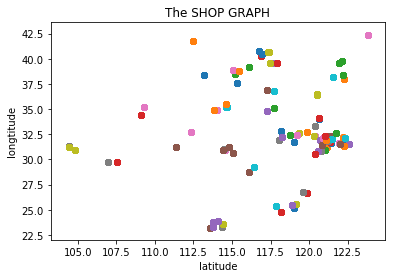

In [7]:
''' So the first we need to locate the mall
    I'll plot a graph to show if the shop will be a cluster'''


# Get a dict consist of the mall_id and the location corresponding

#data[5] means shop_id ; data[2] means latitude; data[3] means longitude
location_shop = {}
for data in shop_data.values:
    if data[5] not in location_shop.keys():
        location_shop[data[5]] = [(data[2],data[3])]
    else: location_shop[data[5]].append((data[2],data[3]))
        
print('The number of the mall',len(location_shop.keys()))

for mall_id in location_shop.keys():
    buff = np.asarray(location_shop[mall_id])
    plt.scatter(buff[:,0],buff[:,1])

plt.title('The SHOP GRAPH')
plt.xlabel('latitude');plt.ylabel('longtitude')
plt.show()

In [8]:
type(person_data['wifi_infos'][0])

str

In [9]:
person_data['wifi_infos'][0]

'b_6396480|-67|false;b_41124514|-86|false;b_28723327|-90|false;b_6396479|-55|false;b_8764723|-90|false;b_32053319|-74|false;b_5857370|-68|false;b_56326644|-89|false;b_56328155|-77|false;b_5857369|-55|false'

In [10]:
shop_mall = pd.Series(location_shop)
print(shop_mall.head(3))
shop_mall.to_csv(r'F:\datasets\customer&fixed-position\data/shop2mall.csv')

m_1021    [(107.516848, 29.738175), (107.516225, 29.7378...
m_1085    [(123.801051, 42.367171), (123.80129699999999,...
m_1089    [(118.20491100000001, 24.782885), (118.20382, ...
dtype: object


In [17]:
# create a csv to give a digit_id for shop_id, mall_id 
shop_id = shop_data['shop_id']
mall_id = shop_data['mall_id']

shop_dic = {}; mall_dic = {}
for index,ids in enumerate(shop_id):
    shop_dic[ids] = index

for i in range(mall_id.shape[0]):
    mall_dic[mall_id[i]] = i
    
df0 = pd.DataFrame({'shop_id':list(shop_dic.keys()),
                    'shop_digit_id':list(shop_dic.values())})                 
df0.to_csv(r'F:\datasets\customer&fixed-position\data/shop_id.csv')

df1 = pd.DataFrame({'mall_id':list(mall_dic.keys()),
                   'mall_digit_id':list(mall_dic.values())})
df1.to_csv(r'F:\datasets\customer&fixed-position\data/mall_id.csv')

In [18]:
i

8476